In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
from tensorflow.keras.optimizers.legacy import Adam
from keras.regularizers import l2
import datetime
import tensorflow as tf
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input

In [5]:
folder_path = "C:/Users/rache/OneDrive - Middle East College/chest_xray"

In [6]:
import os

# Define the folder path
folder_path = "C:/Users/rache/OneDrive - Middle East College/chest_xray"

# List all files in the 'test' directory
test_folder_path = os.path.join(folder_path, "test")
test_files = os.listdir('C:/Users/rache/OneDrive - Middle East College/chest_xray/test')

# List all files in the 'train' directory
train_folder_path = os.path.join(folder_path, "train")
train_files = os.listdir('C:/Users/rache/OneDrive - Middle East College/chest_xray/train')

# List all files in the 'validation' directory
validation_folder_path = os.path.join(folder_path, "validation")
validation_files = os.listdir('C:/Users/rache/OneDrive - Middle East College/chest_xray/val')

# Display the lists of files
print("Test Files:", test_files)
print("Train Files:", train_files)
print("Validation Files:", validation_files)


Test Files: ['NORMAL', 'PNEUMONIA']
Train Files: ['NORMAL', 'PNEUMONIA']
Validation Files: ['NORMAL', 'PNEUMONIA']


In [7]:
img_size = (224, 224, 1)

In [8]:
# Display the counts

# Display the counts
test_count = len(test_files)
train_count = len(train_files)
validation_count = len(validation_files)

print("Test Files Count:", test_count)
print("Train Files Count:", train_count)
print("Validation Files Count:", validation_count)


Test Files Count: 2
Train Files Count: 2
Validation Files Count: 2


In [9]:
import os

# Define the folder paths
train_folder_path = 'C:/Users/rache/OneDrive - Middle East College/chest_xray/train'
test_folder_path = 'C:/Users/rache/OneDrive - Middle East College/chest_xray/test'
validation_folder_path = 'C:/Users/rache/OneDrive - Middle East College/chest_xray/val'

# Count the number of files in the 'train' directory for 'NORMAL' and 'PNEUMONIA'
train_normal_count = len(os.listdir(os.path.join(train_folder_path, 'NORMAL')))
train_pneumonia_count = len(os.listdir(os.path.join(train_folder_path, 'PNEUMONIA')))

# Count the number of files in the 'test' directory for 'NORMAL' and 'PNEUMONIA'
test_normal_count = len(os.listdir(os.path.join(test_folder_path, 'NORMAL')))
test_pneumonia_count = len(os.listdir(os.path.join(test_folder_path, 'PNEUMONIA')))

# Count the number of files in the 'validation' directory for 'NORMAL' and 'PNEUMONIA'
validation_normal_count = len(os.listdir(os.path.join(validation_folder_path, 'NORMAL')))
validation_pneumonia_count = len(os.listdir(os.path.join(validation_folder_path, 'PNEUMONIA')))

# Display the counts
print("Train - NORMAL Count:", train_normal_count)
print("Train - PNEUMONIA Count:", train_pneumonia_count)
print("Test - NORMAL Count:", test_normal_count)
print("Test - PNEUMONIA Count:", test_pneumonia_count)
print("Validation - NORMAL Count:", validation_normal_count)
print("Validation - PNEUMONIA Count:", validation_pneumonia_count)


Train - NORMAL Count: 1341
Train - PNEUMONIA Count: 3875
Test - NORMAL Count: 234
Test - PNEUMONIA Count: 390
Validation - NORMAL Count: 8
Validation - PNEUMONIA Count: 8


In [10]:
import tensorflow as tf

# Define the folder paths
base_folder_path = 'C:/Users/rache/OneDrive - Middle East College/chest_xray'
train_folder_path = 'train'
test_folder_path = 'test'
validation_folder_path = 'validation'

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Flow training images in batches using the generator
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_folder_path, train_folder_path),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training',
    color_mode='grayscale'  # Specify that the images are grayscale
)

# Flow validation images in batches using the generator
validation_generator = train_datagen.flow_from_directory(
    os.path.join(base_folder_path, train_folder_path),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    color_mode='grayscale'  # Specify that the images are grayscale
)


Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

# Create VGG16 base
base_model = VGG16(weights='imagenet', include_top=False, #because I have my own image with different dimension
input_tensor=Input(shape=(224, 224, 3)))

In [12]:
# Freeze the VGG16 layers
for layer in base_model.layers:
    layer.trainable = False 

In [13]:
# Create your custom model on top of the VGG16 base
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))


In [14]:
# Add a layer to convert grayscale to RGB
model.add(Conv2D(3, kernel_size=(1, 1), padding='valid', activation='relu'))



In [15]:
# Add VGG16 base
model.add(base_model)

In [16]:
# Add your custom layers on top
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
# Compile the model with Adam optimizer and a learning rate of 0.001
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 3)       195       
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                        

In [19]:
# Create ImageDataGenerator for test set
test_datagen = ImageDataGenerator(rescale=1./255)

In [20]:

test_generator = test_datagen.flow_from_directory(
    os.path.join(base_folder_path, test_folder_path),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'  
)

Found 624 images belonging to 2 classes.


In [21]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=3
)


Epoch 1/3


131/131 [==============================] - 358s 3s/step - loss: 0.4445 - accuracy: 0.7908 - val_loss: 0.1916 - val_accuracy: 0.9310
Epoch 2/3
131/131 [==============================] - 342s 3s/step - loss: 0.2007 - accuracy: 0.9219 - val_loss: 0.1303 - val_accuracy: 0.9492
Epoch 3/3
131/131 [==============================] - 322s 2s/step - loss: 0.1515 - accuracy: 0.9394 - val_loss: 0.1650 - val_accuracy: 0.9329


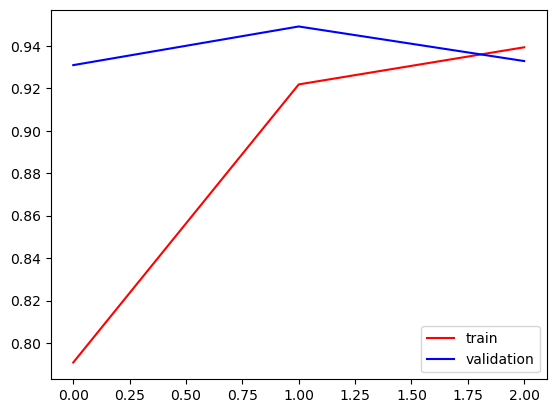

In [22]:
# Plot accuracy and loss
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

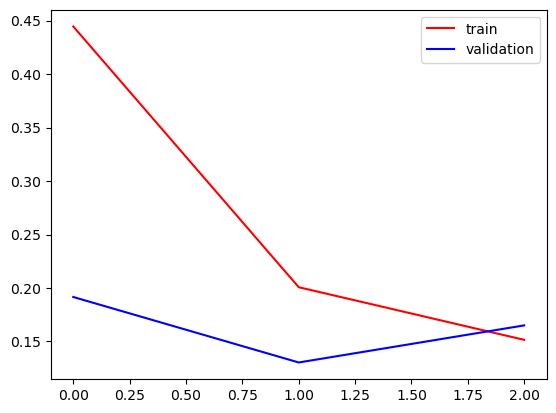

In [23]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [24]:
# Predict the test data
predictions = model.predict(test_generator)
print(predictions)

20/20 [==============================] - 27s 1s/step
[[0.7205693 ]
 [0.73385626]
 [0.96936226]
 [0.99999374]
 [0.943103  ]
 [0.9999892 ]
 [0.9705716 ]
 [0.99661195]
 [0.9992547 ]
 [0.99741334]
 [0.99996996]
 [0.9615753 ]
 [0.99775237]
 [0.8925207 ]
 [0.99076736]
 [0.9990591 ]
 [0.68031704]
 [0.7770146 ]
 [0.50824714]
 [0.12497617]
 [0.74173826]
 [0.6735882 ]
 [0.77516556]
 [0.26437062]
 [0.99999964]
 [0.9959077 ]
 [0.99761254]
 [0.9997707 ]
 [0.93212456]
 [0.9999528 ]
 [0.99345106]
 [0.99914837]
 [0.94926405]
 [0.9470083 ]
 [0.24407256]
 [0.65122   ]
 [0.28180572]
 [0.9999995 ]
 [0.9991567 ]
 [0.5009841 ]
 [0.99995375]
 [0.9994582 ]
 [0.98484874]
 [0.99969673]
 [0.9989971 ]
 [0.8490644 ]
 [0.99999744]
 [0.669279  ]
 [0.9999918 ]
 [0.9999994 ]
 [0.88997406]
 [0.98132205]
 [1.        ]
 [0.38593012]
 [0.49638292]
 [0.9999977 ]
 [0.99986994]
 [0.9999999 ]
 [0.9999996 ]
 [0.99939305]
 [0.9697762 ]
 [0.99960744]
 [0.99954325]
 [0.999977  ]
 [0.4426399 ]
 [0.9999991 ]
 [0.9102771 ]
 [0.99999

In [25]:
len(predictions)

624

In [26]:
# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_generator.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed



In [27]:
# Define class labels
class_labels = ['NORMAL', 'PNEUMONIA']

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)


# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))


Confusion Matrix:
[[ 20 214]
 [ 30 360]]
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.09      0.14       234
           1       0.63      0.92      0.75       390

    accuracy                           0.61       624
   macro avg       0.51      0.50      0.44       624
weighted avg       0.54      0.61      0.52       624



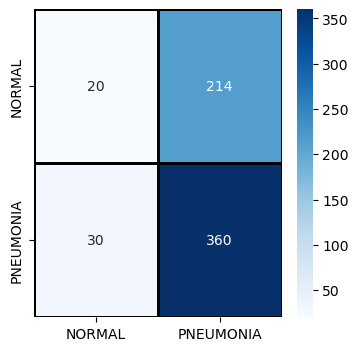

In [28]:
# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='', xticklabels=class_labels, yticklabels=class_labels)
plt.show()

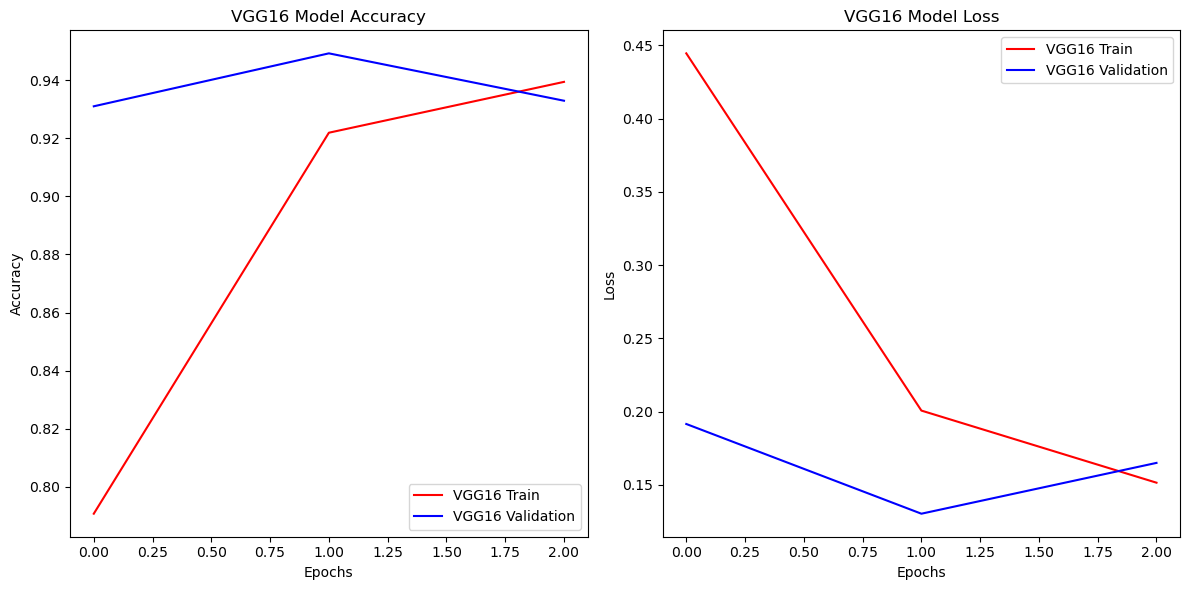

In [36]:
import matplotlib.pyplot as plt

# Plot accuracy and loss for VGG16
plt.figure(figsize=(12, 6))

# Plot VGG16 accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='red', label='VGG16 Train')
plt.plot(history.history['val_accuracy'], color='blue', label='VGG16 Validation')
plt.title('VGG16 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot VGG16 loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='red', label='VGG16 Train')
plt.plot(history.history['val_loss'], color='blue', label='VGG16 Validation')
plt.title('VGG16 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()